# Agenda: Plotting

1. Plotting with series
    - Line plots
    - Bar plots
    - Pie plots
    - Box plots
    - Histograms
2. Plotting with a data frame
    - All of the above , plus
    - Scatter plots


# How will we be plotting?

We're going to use Pandas, and its API for plotting, which gives us a nicer layer over Matplotlib. If and when we want, we can pass Matplotlib arguments to our Pandas methods, and those will be passed along.

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
np.random.seed(0)

s = Series(np.random.randint(0, 100, 10),
           index=list('abcdefghij'))
s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

<Axes: >

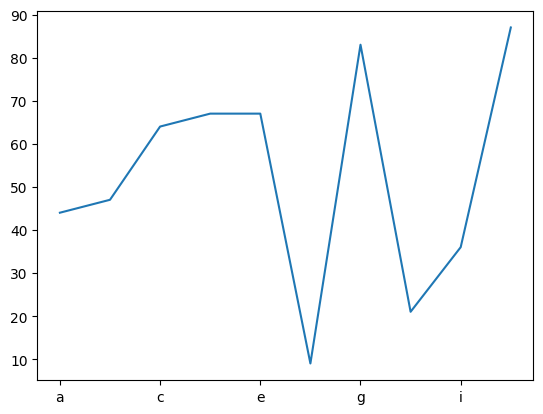

In [4]:
# the easiest way to plot something is with the "plot" method

s.plot()

How did it know what kind of plot to make?

- It took the index (row labels) and used them for the x axis
- It took the values (integers) and used them for the y axis and values
- It assumes that we want to do a "line plot," where it puts the x,y values and then draws lines between them

<Axes: >

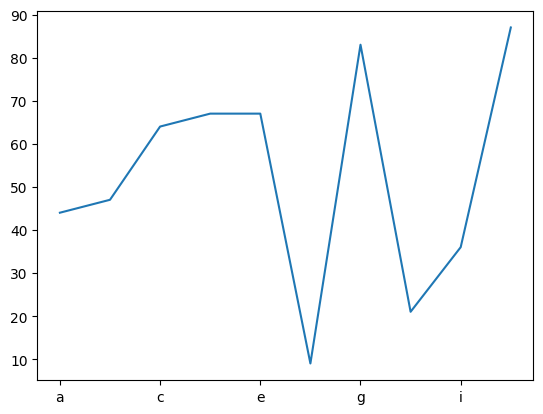

In [5]:
# we can be more explicit about what kind of plot we want, by invoking a method on the "plot" object

s.plot.line()

<Axes: title={'center': 'My amazing plot'}>

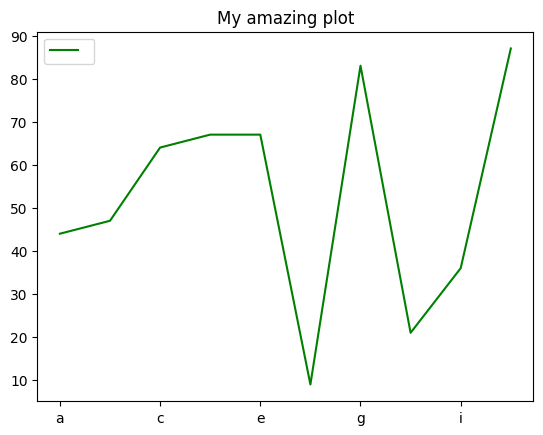

In [6]:
# we can set the title
# and the color and whether we want a legend

s.plot.line(title='My amazing plot', color='green', legend=True)

<Axes: title={'center': 'My amazing plot'}>

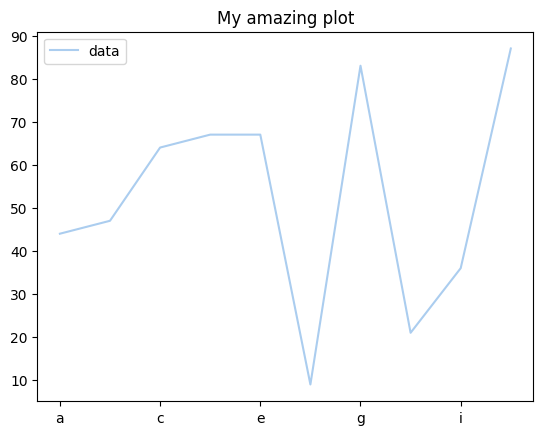

In [10]:
s.name = 'data'
s.plot.line(title='My amazing plot', color='#abcdef', legend=True)

In [11]:
help(s.plot.line)

Help on method line in module pandas.plotting._core:

line(x: 'Hashable | None' = None, y: 'Hashable | None' = None, **kwargs) -> 'PlotAccessor' method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.

    This function is useful to plot lines using DataFrame's values
    as coordinates.

    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array-like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:

        - A single color string referred to by name, RGB or RGBA code,
            for instance 'red' or '#a98d19'.

        - A sequence of color strings referred to by name, RGB or RGBA
            code, which will be

In [12]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' :

<Axes: title={'center': 'My amazing plot'}>

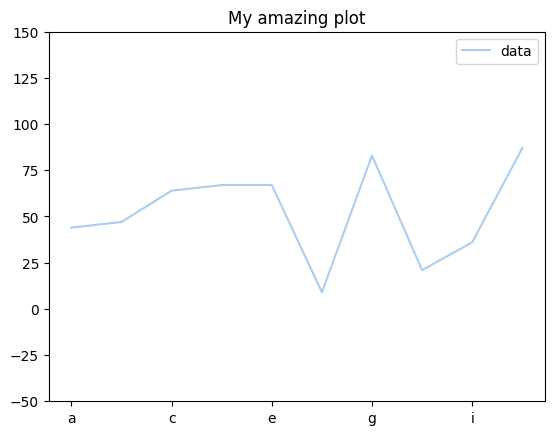

In [13]:
s.plot.line(title='My amazing plot', color='#abcdef', legend=True, ylim=(-50, 150))

<Axes: >

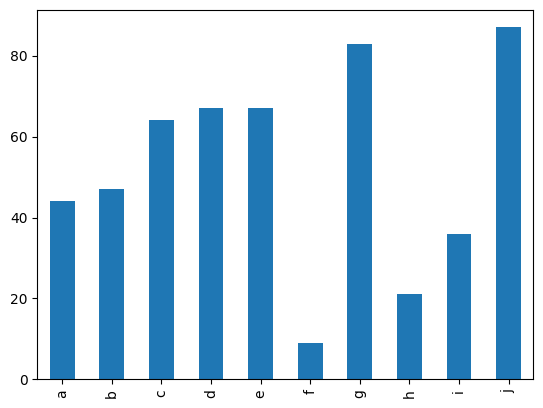

In [14]:
# what about bar plots?

s.plot.bar()


<Axes: title={'center': 'My amazing plot'}>

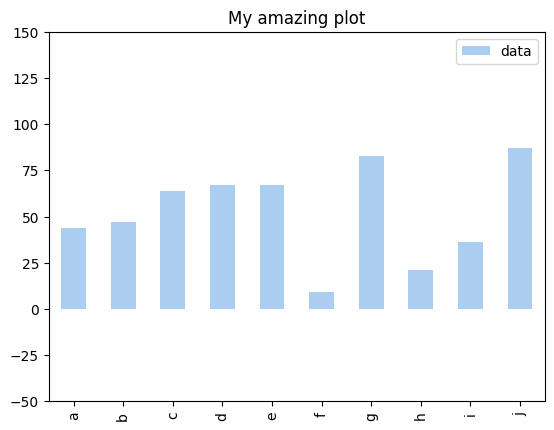

In [15]:
s.plot.bar(title='My amazing plot', color='#abcdef', legend=True, ylim=(-50, 150))

# Exercise: Plotting temperature

1. Define a series with 10 elements, integers representing the forecast temperature for the next 10 days. The index should reflect the dates in MMDD format.
2. Create a line plot from that data (get it from the Web). Set the y limits to be lower and higher than any normal temperature should be.
3. Create a bar plot with that data, setting the title and color.


In [16]:
s = Series([35, 34, 33, 33, 34, 35, 35, 34, 34, 34],
           index='0808 0809 0810 0811 0812 0813 0814 0815 0816 0817'.split())
s

0808    35
0809    34
0810    33
0811    33
0812    34
0813    35
0814    35
0815    34
0816    34
0817    34
dtype: int64

<Axes: >

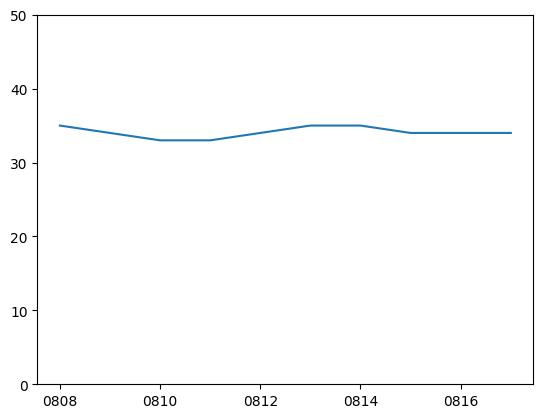

In [17]:
s.plot.line(ylim=(0, 50))

<Axes: title={'center': 'high temps'}>

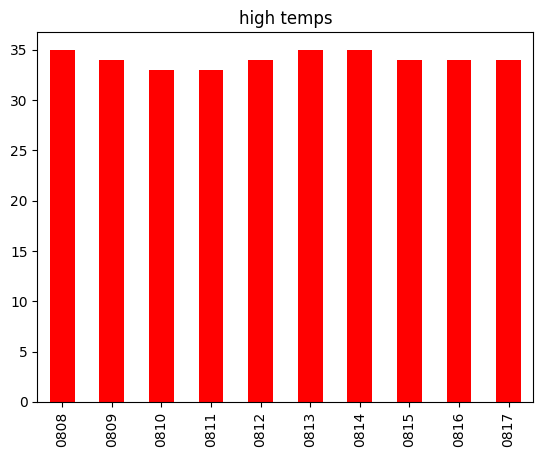

In [18]:
s.plot.bar(title='high temps', color='red')

# Pie charts / pie plots

We have a bunch of figures, and we want to know what proportion each value consumes from the whole.

Be sure that you know what you're doing when you ask for a pie chart! 

<Axes: >

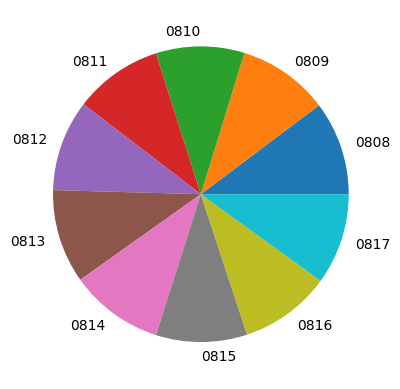

In [19]:
# Bad example:  let's make a pie chart from the temperatures!

s.plot.pie()

In [20]:
# I might, however, want to know, how often each temperature is appearing
# and then plot that as a pie chart

# how can I turn my temps into a frequency listing? 
# value_counts

s.value_counts()

34    5
35    3
33    2
Name: count, dtype: int64

<Axes: ylabel='count'>

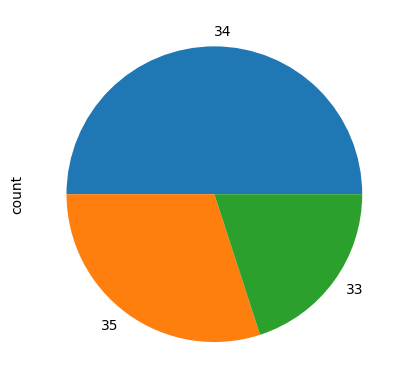

In [21]:
s.value_counts().plot.pie()

<Axes: >

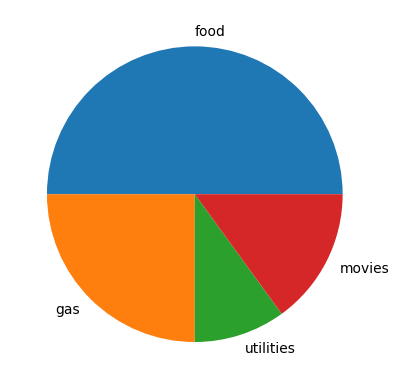

In [22]:
s = Series([50, 25, 10, 15], 
           index=['food', 'gas', 'utilities', 'movies'])
s.plot.pie()

<Axes: ylabel='Frequency'>

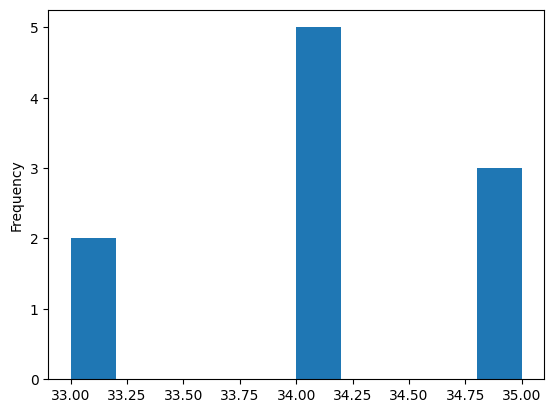

In [23]:
# another way to visualize the frequency distribution is with a histogram

s = Series([35, 34, 33, 33, 34, 35, 35, 34, 34, 34],
           index='0808 0809 0810 0811 0812 0813 0814 0815 0816 0817'.split())

s.plot.hist()

<Axes: ylabel='Frequency'>

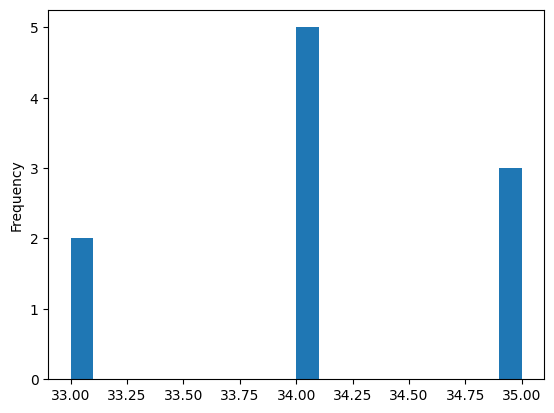

In [24]:
# what if I want a smaller/larger number of bins?
# just pass bins=n (for whatever value you want) to plot.hist

s.plot.hist(bins=20)

<Axes: ylabel='Frequency'>

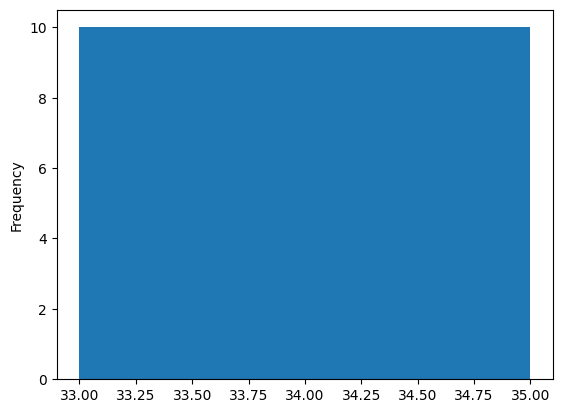

In [25]:
s.plot.hist(bins=1)

In [26]:
# if you're doing a pie plot, you will probably want to use value_counts first
# if you're doing a histogram, it effectively does the value_counts for you

# Exercise: Taxi plotting

1. Load the `data/taxi.csv` data file, with 10,000 NYC taxi rides.
2. Create a pie plot showing the distribution of `passenger_count`.
3. Create a pie plot showing how often we have short vs. medium vs. long rides, where short is anything < 1 mile, long is anything > 10 miles, and medium is anything in the middle.
4. Show a histogram of the amounts that people paid.